<a href="https://colab.research.google.com/github/hanansuk/guns_n_roses/blob/main/cdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('lmtest')
install.packages('sandwich')
install.packages('stargazer')
install.packages('corrplot')
install.packages('plotly')
install.packages('googledrive')
install.packages('httpuv')
install.packages('reshape2')
install.packages('ggrepel')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
library(sandwich)
library(lmtest)
library(stargazer)
library(cli)
library(corrplot)
library(scales)
library(tidyverse)
library(stats)
library(plotly)
library(ggrepel)
library(reshape2)
library(googledrive) 
library(httpuv)
library(repr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


corrplot 0.92 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


Attaching package: ‘plotly’


In [3]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may update python version  
                                       #occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

In [4]:
lagpad <- function(x, k) {
  if (k>0 & (k %% 5 != 0)) {
    return (c(rep(NA, k), x)[1 : length(x)] );
  }
  else {
    return (c(x[(-k+1) : length(x)], rep(NA, -k)));
  }
}

In [5]:
x <- drive_get("~/deaths_by_month_2.txt")
drive_download(x, overwrite = TRUE)
cdc <- read.table("/content/deaths_by_month_2.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc <- cdc[,-1]

No encoding supplied: defaulting to UTF-8.

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=f9449dcc876035e73dc1802553ef9371&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWJVUjJWUEx6Y3d4Q0pnVTZHZGtLWDdJaWhpd2N5NURBYTRTSG9SQkR4VG9PaXlZbC1aQV9XYm1UQ3NKamZLWEpBeGRpUSIsInN0YXRlIjoiZjk0NDlkY2M4NzYwMzVlNzNkYzE4MDI1NTNlZjkzNzEifQ==


✔ The input `path` resolved to exactly 1 file.

File downloaded:

• deaths_by_month_2.txt <id: 16iTRL_xh2op8Gj6-ORnrxrTDRZ-p-ZGl>

Saved locally as:

• deaths_by_month_2.txt



In [6]:
glimpse(cdc)
head(cdc)

Rows: 204
Columns: 7
$ State      <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alaska", "Alas…
$ State.Code <int> 1, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6,…
$ Year       <dbl> 2018, 2019, 2020, 2021, 2018, 2019, 2020, 2021, 2018, 2019,…
$ Year.Code  <int> 2018, 2019, 2020, 2021, 2018, 2019, 2020, 2021, 2018, 2019,…
$ Deaths     <int> 1060, 1071, 1135, 1304, 151, 175, 170, 181, 1122, 1123, 123…
$ Population <int> 4887871, 4903185, 4921532, 5039877, 737438, 731545, 731158,…
$ Crude.Rate <dbl> 21.7, 21.8, 23.1, 25.9, 20.5, 23.9, 23.3, 24.7, 15.6, 15.4,…


,State,State.Code,Year,Year.Code,Deaths,Population,Crude.Rate
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,Alabama,1,2018,2018,1060,4887871,21.7
2,Alabama,1,2019,2019,1071,4903185,21.8
3,Alabama,1,2020,2020,1135,4921532,23.1
4,Alabama,1,2021,2021,1304,5039877,25.9
5,Alaska,2,2018,2018,151,737438,20.5
6,Alaska,2,2019,2019,175,731545,23.9


In [7]:
summary(cdc)

    State             State.Code         Year        Year.Code   
 Length:204         Min.   : 1.00   Min.   :2018   Min.   :2018  
 Class :character   1st Qu.:16.00   1st Qu.:2019   1st Qu.:2019  
 Mode  :character   Median :29.00   Median :2020   Median :2020  
                    Mean   :28.96   Mean   :2020   Mean   :2020  
                    3rd Qu.:42.00   3rd Qu.:2020   3rd Qu.:2020  
                    Max.   :56.00   Max.   :2021   Max.   :2021  
     Deaths         Population         Crude.Rate   
 Min.   :  37.0   Min.   :  577737   Min.   : 3.40  
 1st Qu.: 202.5   1st Qu.: 1786496   1st Qu.:11.10  
 Median : 608.0   Median : 4472826   Median :13.95  
 Mean   : 839.7   Mean   : 6454828   Mean   :14.62  
 3rd Qu.:1169.5   3rd Qu.: 7555416   3rd Qu.:18.43  
 Max.   :4575.0   Max.   :39557045   Max.   :32.40  

In [8]:
cdc_2 <- cdc %>%
  arrange(State, Year)

cdc_2$Year = as.numeric(as.character(cdc_2$Year))

In [9]:
cdc_by_state <- cdc_2 %>%
  mutate(YoY = (((Deaths - lagpad(Deaths, 1))/Deaths)))

lag_function <- function(x) {
  x[seq_along(x) %% 4 == 0] <- NA
  x
}

cdc_by_state$YoY[2:nrow(cdc_by_state)] <- lag_function(cdc_by_state$YoY[2:nrow(cdc_by_state)])


cdc_by_state

State,State.Code,Year,Year.Code,Deaths,Population,Crude.Rate,YoY
<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
Alabama,1,2018,2018,1060,4887871,21.7,NA
Alabama,1,2019,2019,1071,4903185,21.8,0.010270775
Alabama,1,2020,2020,1135,4921532,23.1,0.056387665
Alabama,1,2021,2021,1304,5039877,25.9,0.129601227
Alaska,2,2018,2018,151,737438,20.5,NA
Alaska,2,2019,2019,175,731545,23.9,0.137142857
Alaska,2,2020,2020,170,731158,23.3,-0.029411765
Alaska,2,2021,2021,181,732673,24.7,0.060773481
Arizona,4,2018,2018,1122,7171646,15.6,NA


In [10]:
top_bottom_states <- cdc_by_state %>%
  group_by(State) %>%
  summarise(avg_growth_rate = ((Deaths[Year == 2021] - Deaths[Year == 2018])/Deaths[Year == 2021])) %>%
  filter(dense_rank(avg_growth_rate) <= 5 | dense_rank(desc(avg_growth_rate)) <= 5) %>%
  arrange(desc(avg_growth_rate))

top_bottom_states

State,avg_growth_rate
<chr>,<dbl>
Rhode Island,0.41269841
Montana,0.34532374
District of Columbia,0.31693989
Delaware,0.31410256
Illinois,0.30551340
Idaho,0.03691275
Vermont,0.02439024
West Virginia,-0.06603774
Massachusetts,-0.07563025


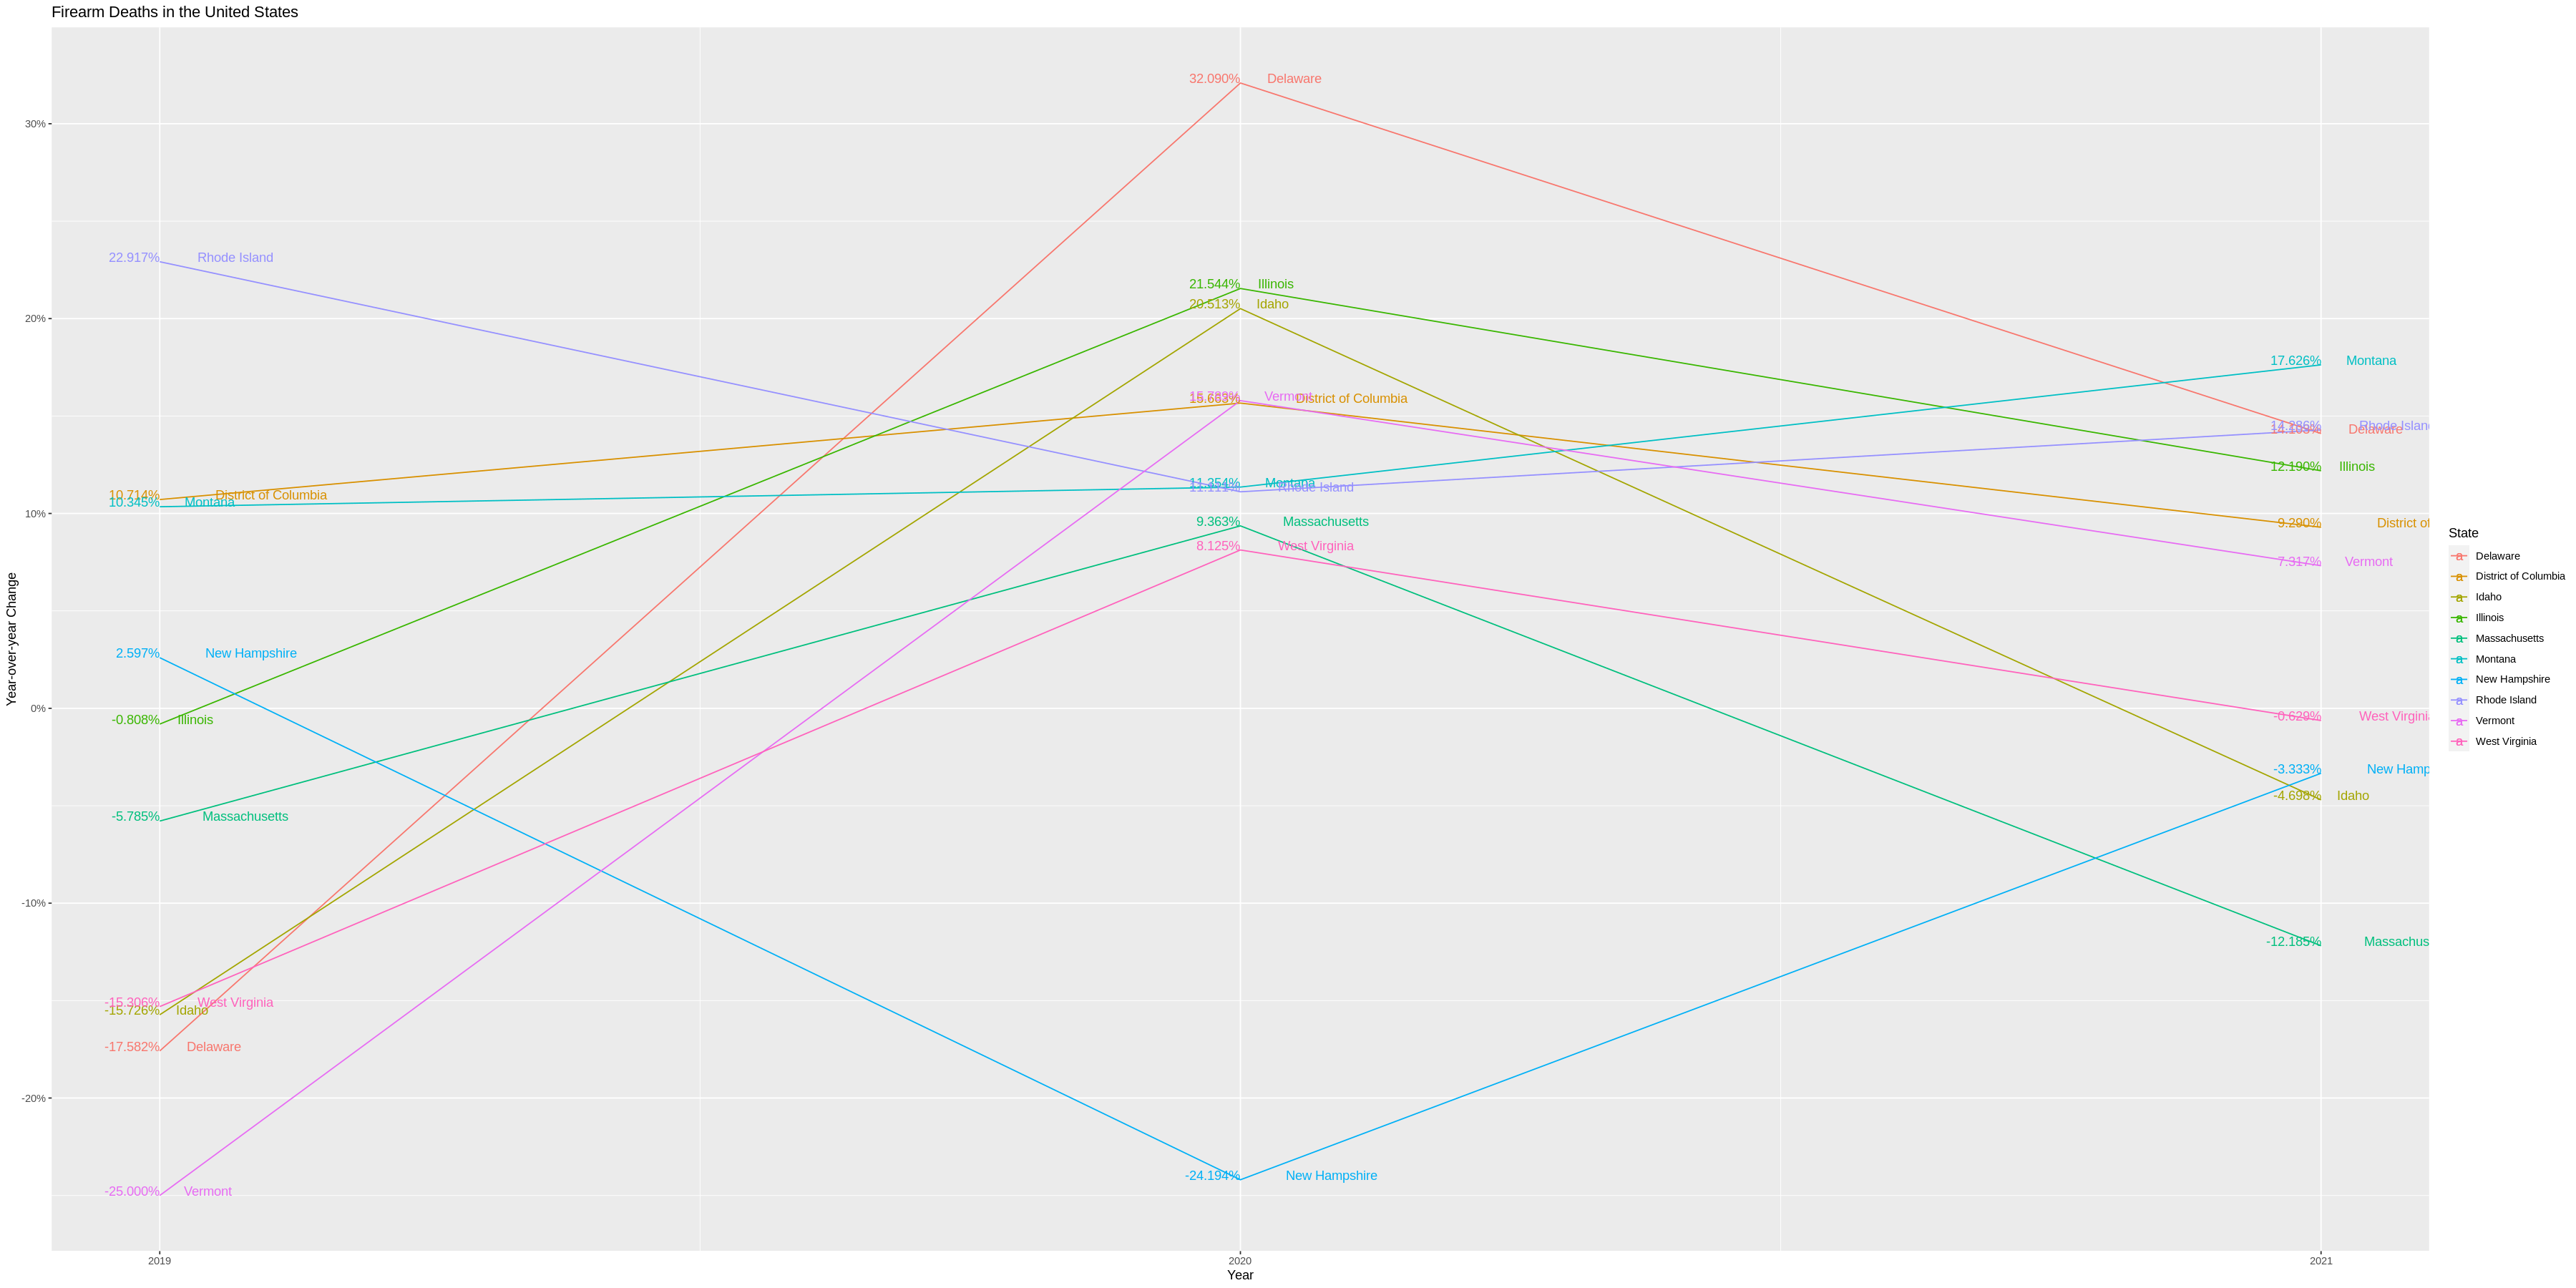

In [11]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_by_state$Year <- as.numeric(as.character(cdc_by_state$Year))
cdc_by_state$State <- factor(cdc_by_state$State)

cdc_by_state %>%
  filter(State %in% top_bottom_states$State & Year != 2018) %>%
  ggplot(aes(x = Year, y = YoY, color = State)) +
  geom_line() +
  scale_x_continuous(breaks = seq(2018, 2021, 1)) +
  labs(color = "State") +
  scale_y_continuous(labels = scales::percent) +
  geom_text(aes(x = Year, y = YoY, label = State), hjust = -0.5, vjust = 0) +
  geom_text(aes(x = Year, y = YoY, label = label_percent()(YoY)), hjust = 1, vjust = 0) +
  ggtitle("Firearm Deaths in the United States") +
  xlab("Year") +
  ylab("Year-over-year Change")

In [12]:
top_bottom_states_all <- cdc_by_state %>%
  group_by(State) %>%
  summarise(avg_growth_rate = ((Deaths[Year == 2021] - Deaths[Year == 2018])/Deaths[Year == 2021]), crude_rate = (mean(Deaths/Population))*1000) %>%
  arrange(desc(avg_growth_rate))

top_bottom_states_all

State,avg_growth_rate,crude_rate
<fct>,<dbl>,<dbl>
Rhode Island,0.41269841,0.04722220
Montana,0.34532374,0.20623393
District of Columbia,0.31693989,0.22057782
Delaware,0.31410256,0.12383721
Illinois,0.30551340,0.12729458
North Dakota,0.30468750,0.13308898
Mississippi,0.29424084,0.26516673
Wisconsin,0.25350318,0.11412197
Connecticut,0.24590164,0.05787685


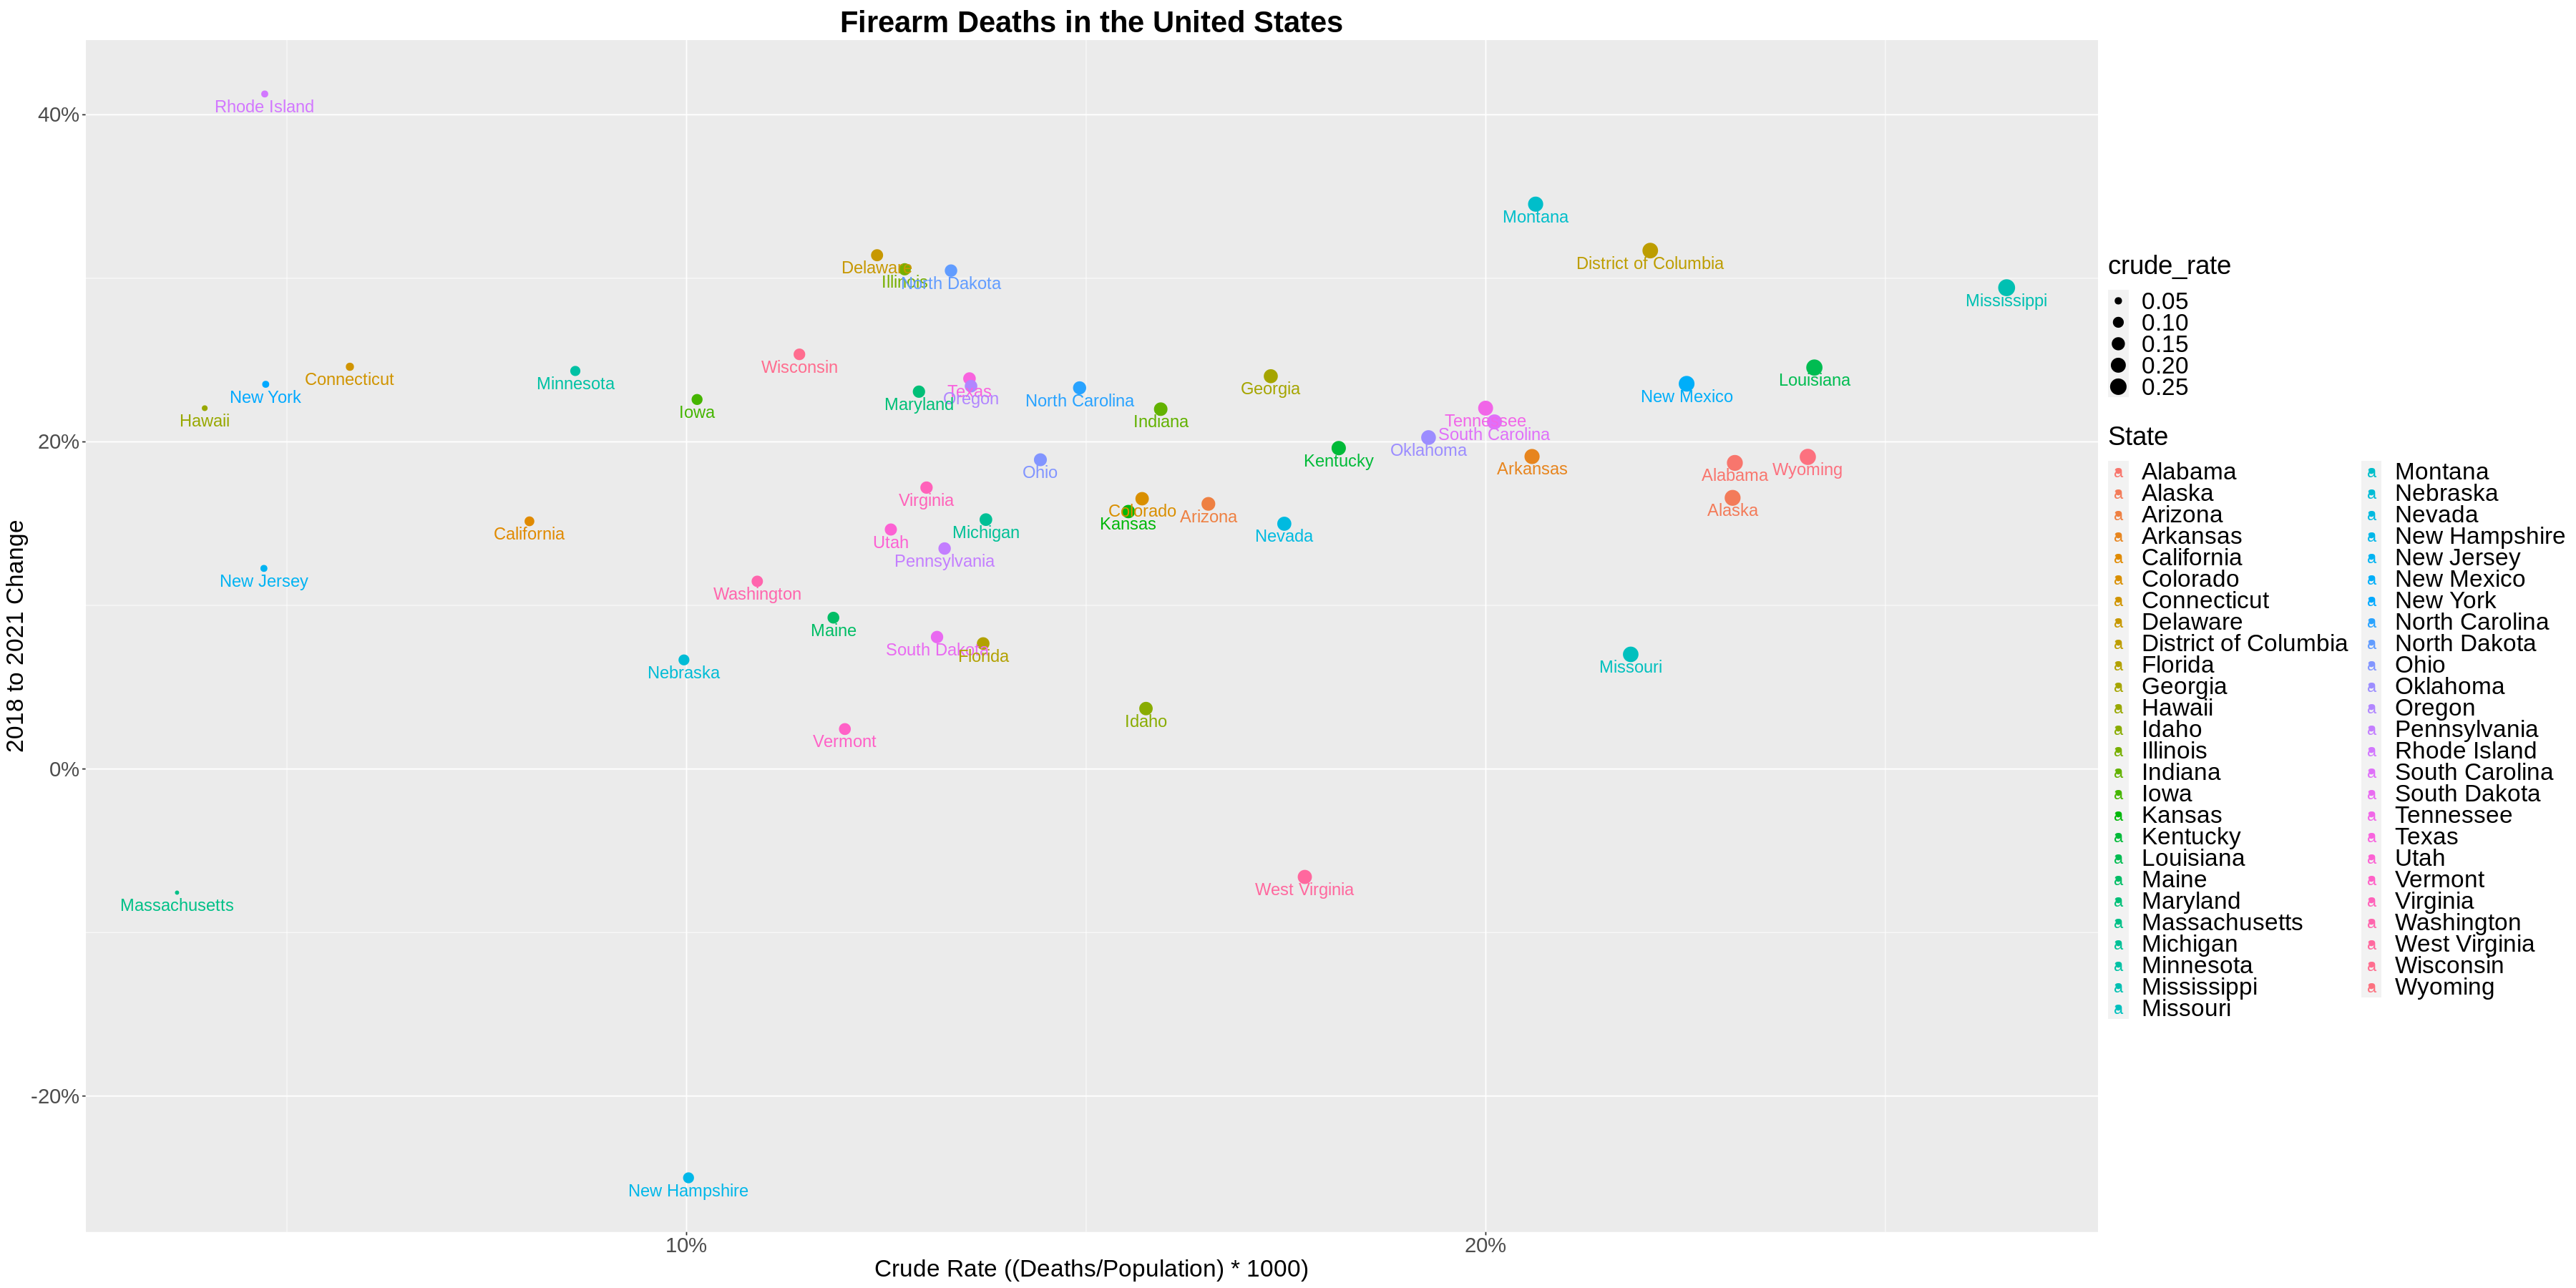

In [13]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_by_state$Year <- as.numeric(as.character(cdc_by_state$Year))
cdc_by_state$State <- factor(cdc_by_state$State)

top_bottom_states_all %>%
  ggplot(aes(x = crude_rate, y = avg_growth_rate, color=State)) +
  geom_point(aes(size = crude_rate)) +
  geom_text(aes(x = crude_rate, y = avg_growth_rate, label=State), hjust = 0.5, vjust = 1.5, cex = 5) +
  theme(axis.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.box.spacing = unit(0.1, "cm"),
        legend.title = element_text(size = 22),
        axis.text.x = element_text(size = rel(2)),
        axis.text.y = element_text(size = rel(2)),
        plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2))+
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent) +
  ggtitle("Firearm Deaths in the United States") +
  guides(colour=guide_legend(ncol=2)) +
  xlab("Crude Rate ((Deaths/Population) * 1000)") +
  ylab("2018 to 2021 Change")

In [14]:
cdc_yoy <- cdc_2 %>%
  group_by(Year) %>%
  summarise(Deaths = sum(Deaths), Population = sum(Population)) %>%
  mutate(YoY = (((Deaths - lag(Deaths, 1))/Deaths)), YoY_Population = (((Population - lag(Population, 1))/Population)))

cdc_yoy

Year,Deaths,Population,YoY,YoY_Population
<dbl>,<int>,<int>,<dbl>,<dbl>
2018,39201,327167434,NA,NA
2019,39187,328239523,-0.0003572613,0.003266179
2020,44611,329484123,0.1215843626,0.003777420
2021,48293,331893745,0.0762429338,0.007260221


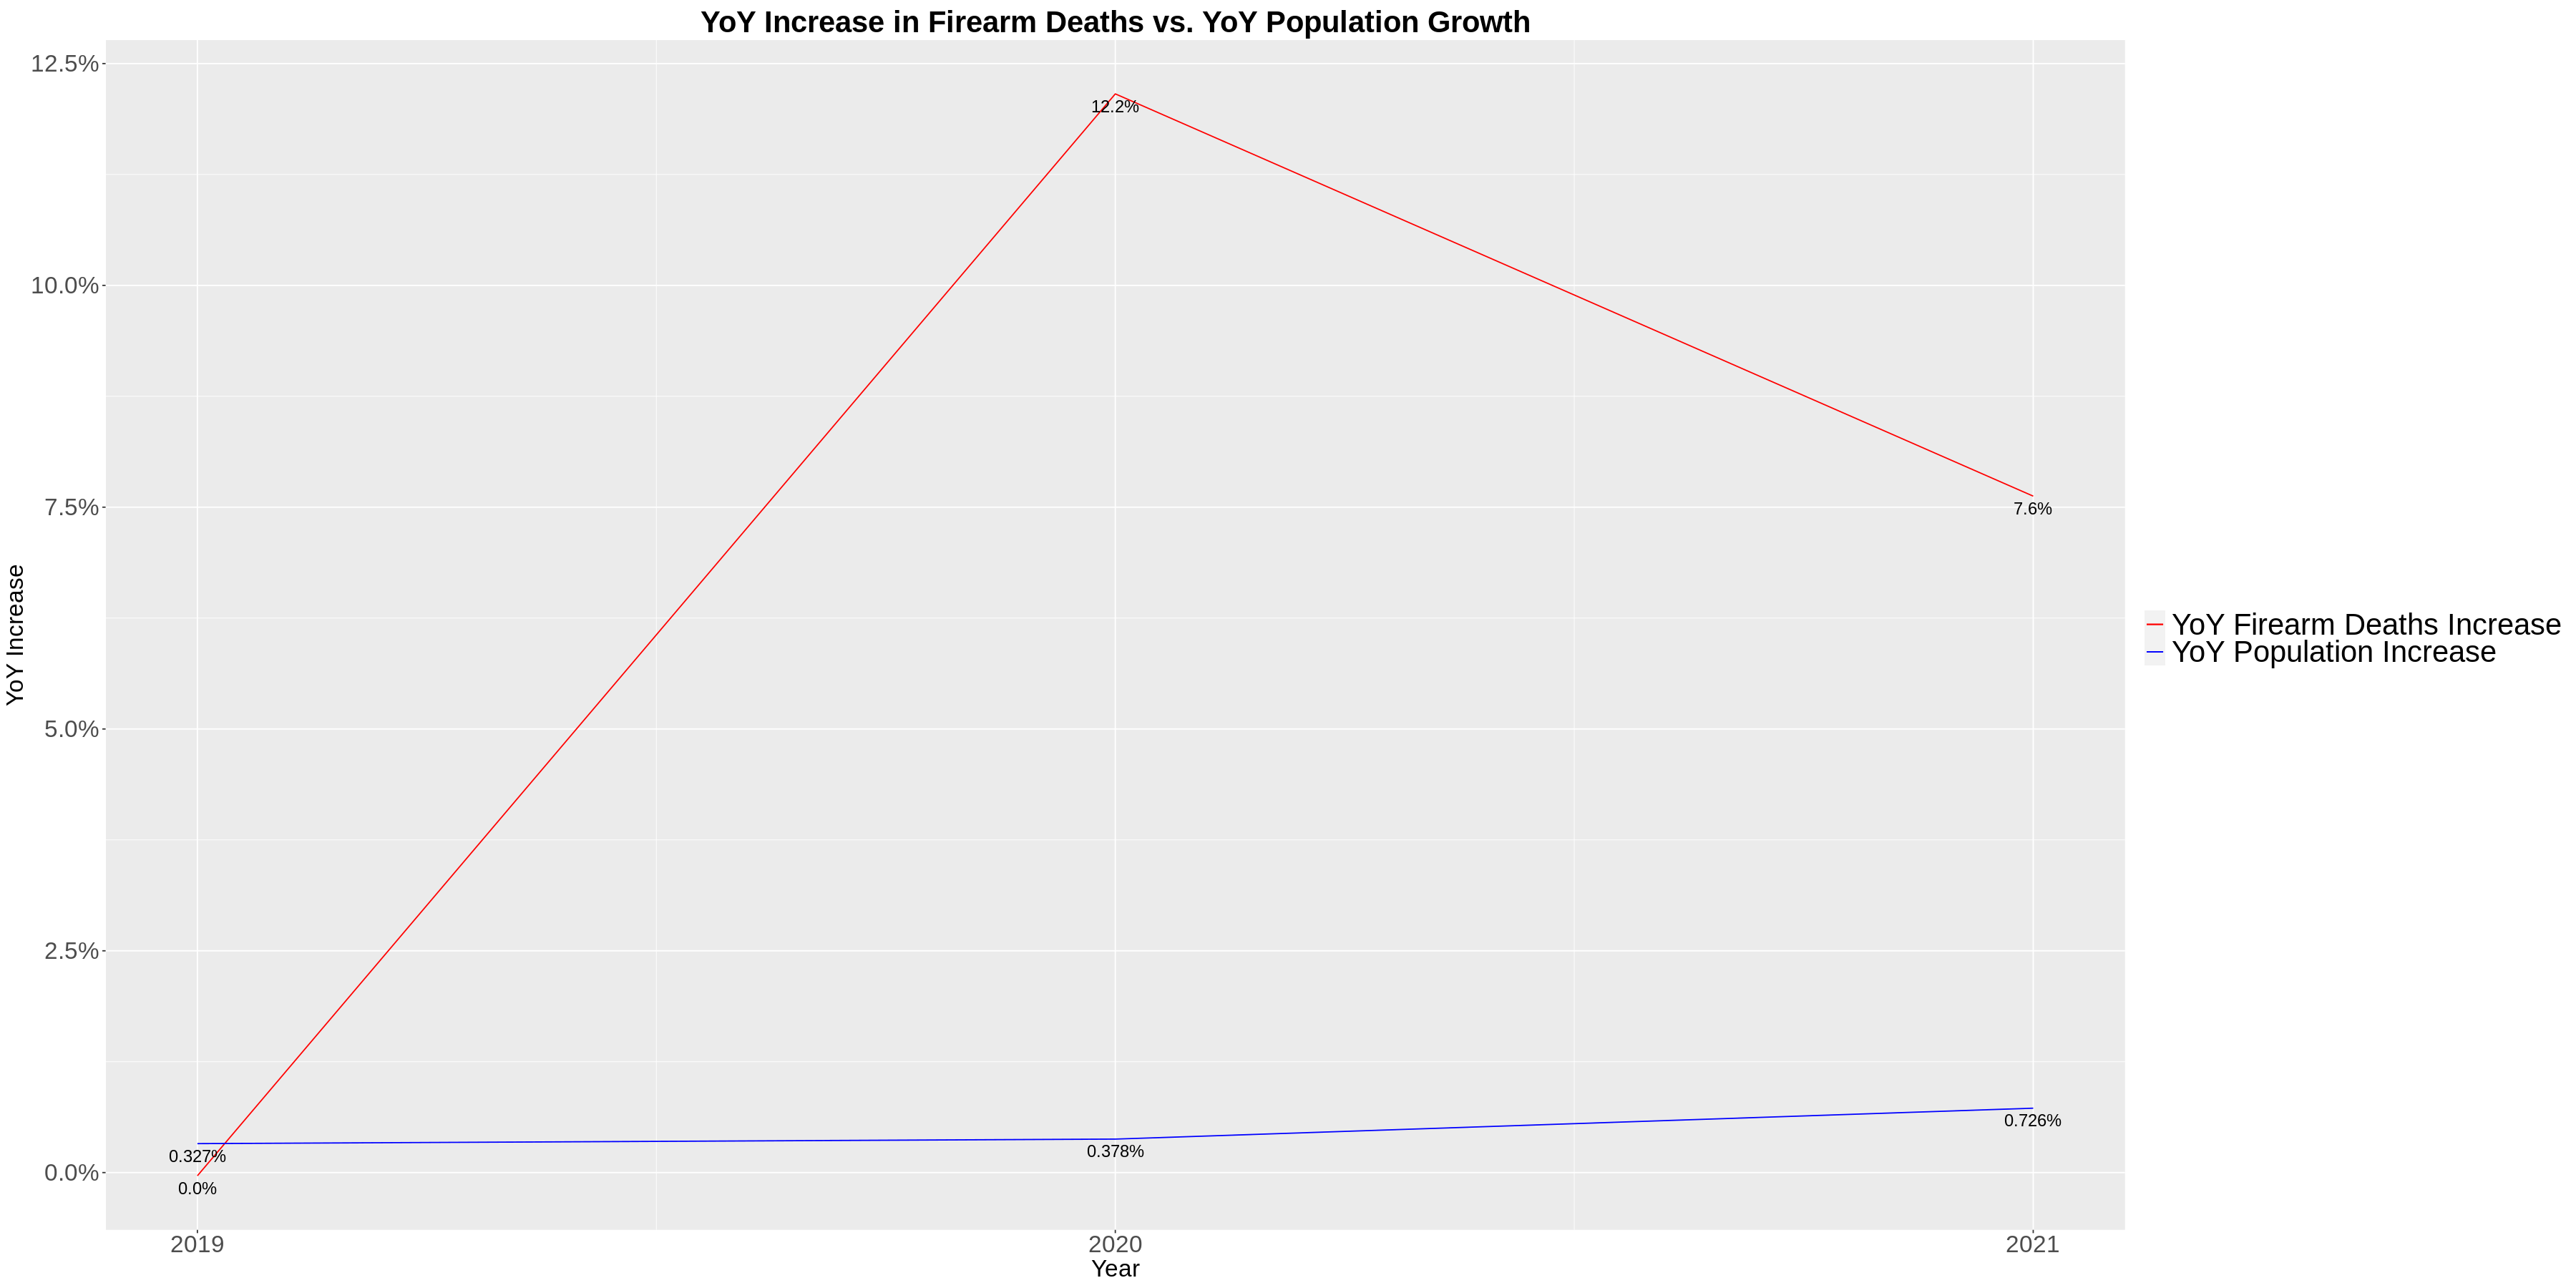

In [15]:
options(repr.plot.width=30, repr.plot.height=15)

cdc_yoy$Year <- as.numeric(as.character(cdc_yoy$Year))

cdc_yoy %>%
filter(!(is.na(YoY))) %>%
ggplot(aes(x = Year)) +
  geom_line(aes(y = YoY, color = "YoY Firearm Deaths Increase")) +
  geom_line(aes(y = YoY_Population, color = "YoY Population Increase")) +
  scale_color_manual(values = c("red", "blue")) +
  labs(title = "YoY Increase in Firearm Deaths vs. YoY Population Growth", x = "Year", y = "YoY Increase") +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(breaks = seq(2019, 2021, 1)) +
  geom_text(aes(x = Year, y = YoY, label = scales::percent(YoY)), vjust = 1.5, cex = 5) +
  geom_text(aes(x = Year, y = YoY_Population, label = scales::percent(YoY_Population)), vjust = 1.5, cex = 5) +
  theme(
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 25),
    plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
    axis.text.x = element_text(size = rel(2)),
    axis.text.y = element_text(size = rel(2)),
  )


In [16]:
x <- drive_get("~/deaths_by_month_3.txt")
drive_download(x, overwrite = TRUE)
cdc_3 <- read.table("/content/deaths_by_month_3.txt", header = TRUE, sep = '\t', dec = ".", row.names=NULL)
cdc_3 <- cdc_3[,-1]

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• deaths_by_month_3.txt <id: 1E5vsdYy7-VwieRNfKlmMDLXi__Q8iTWF>

Saved locally as:

• deaths_by_month_3.txt



In [17]:
glimpse(cdc_3)
head(cdc_3)

Rows: 192
Columns: 9
$ Year                       <dbl> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2…
$ Year.Code                  <int> 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2…
$ Month                      <chr> "Jan., 2018", "Jan., 2018", "Jan., 2018", "…
$ Month.Code                 <chr> "2018/01", "2018/01", "2018/01", "2018/01",…
$ ICD.10.113.Cause.List      <chr> "Accidental discharge of firearms (W32-W34)…
$ ICD.10.113.Cause.List.Code <chr> "GR113-119", "GR113-125", "GR113-128", "GR1…
$ Deaths                     <int> 47, 2169, 1267, 37, 35, 1836, 1028, 23, 32,…
$ Population                 <chr> "Not Applicable", "Not Applicable", "Not Ap…
$ Crude.Rate                 <chr> "Not Applicable", "Not Applicable", "Not Ap…


,Year,Year.Code,Month,Month.Code,ICD.10.113.Cause.List,ICD.10.113.Cause.List.Code,Deaths,Population,Crude.Rate
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,2018,2018,"Jan., 2018",2018/01,Accidental discharge of firearms (W32-W34),GR113-119,47,Not Applicable,Not Applicable
2,2018,2018,"Jan., 2018",2018/01,Intentional self-harm (suicide) by discharge of firearms (X72-X74),GR113-125,2169,Not Applicable,Not Applicable
3,2018,2018,"Jan., 2018",2018/01,"Assault (homicide) by discharge of firearms (*U01.4,X93-X95)",GR113-128,1267,Not Applicable,Not Applicable
4,2018,2018,"Jan., 2018",2018/01,"Discharge of firearms, undetermined intent (Y22-Y24)",GR113-132,37,Not Applicable,Not Applicable
5,2018,2018,"Feb., 2018",2018/02,Accidental discharge of firearms (W32-W34),GR113-119,35,Not Applicable,Not Applicable
6,2018,2018,"Feb., 2018",2018/02,Intentional self-harm (suicide) by discharge of firearms (X72-X74),GR113-125,1836,Not Applicable,Not Applicable


In [24]:
cdc_3 = subset(cdc_3, select = -c(Population, Crude.Rate))

In [25]:
summary(cdc_3)

      Year        Year.Code       Month            Month.Code       
 Min.   :2018   Min.   :2018   Length:192         Length:192        
 1st Qu.:2019   1st Qu.:2019   Class :character   Class :character  
 Median :2020   Median :2020   Mode  :character   Mode  :character  
 Mean   :2020   Mean   :2020                                        
 3rd Qu.:2020   3rd Qu.:2020                                        
 Max.   :2021   Max.   :2021                                        
 ICD.10.113.Cause.List ICD.10.113.Cause.List.Code     Deaths      
 Length:192            Length:192                 Min.   :  18.0  
 Class :character      Class :character           1st Qu.:  37.0  
 Mode  :character      Mode  :character           Median : 530.0  
                                                  Mean   : 892.1  
                                                  3rd Qu.:1877.2  
                                                  Max.   :2378.0  

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


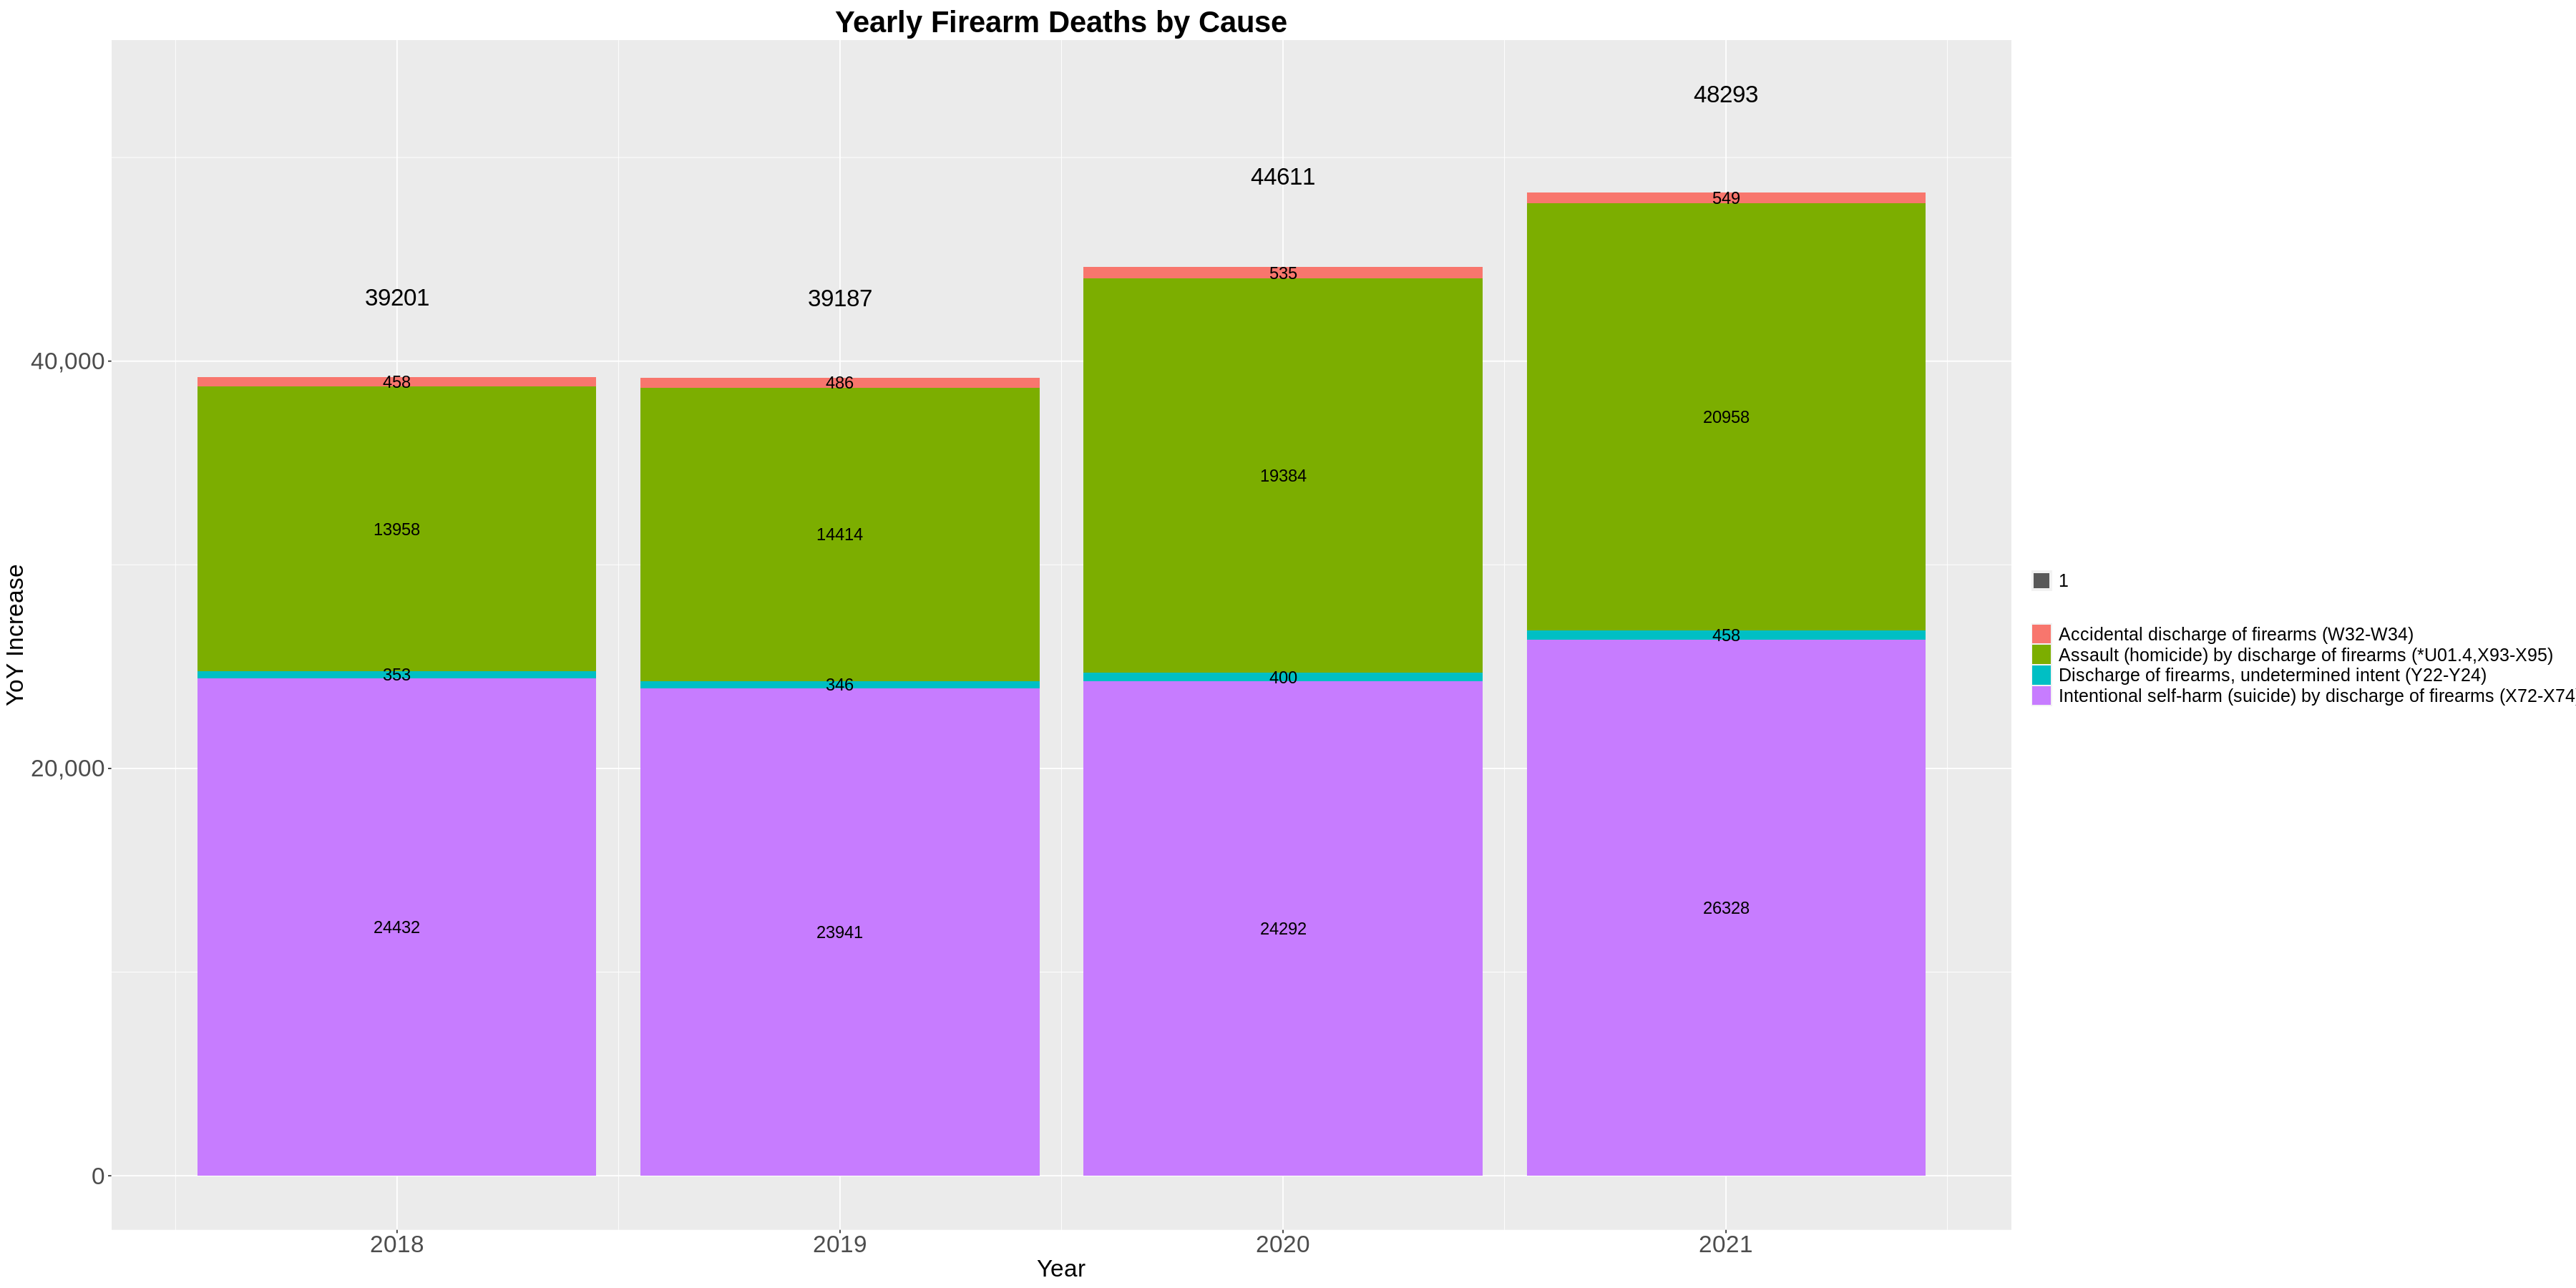

In [26]:
cdc_3 %>%
  group_by(Year, ICD.10.113.Cause.List) %>%
  summarise(Deaths = sum(Deaths))  %>%
  arrange(Year, desc(Deaths)) %>%
  ggplot(aes(x = Year, fill = ICD.10.113.Cause.List, y = Deaths, label = Deaths)) +
  geom_bar(position="stack", stat="sum") +
  geom_text(size = 5, position = position_stack(vjust = 0.5)) + 
  geom_text(aes(label = after_stat(y), group = Year), stat = 'summary', fun = sum, size = 7, position = position_stack(vjust = 1.1)) + 
  labs(title = "Yearly Firearm Deaths by Cause", x = "Year", y = "YoY Increase") +
  scale_y_continuous(labels = scales::label_comma()) +
  theme(
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 10),
    legend.title = element_blank(),
    legend.text = element_text(size = 15),
    plot.title = element_text(face = 'bold', size = 25, hjust = 0.5, vjust = 0.2),
    axis.text.x = element_text(size = rel(2)),
    axis.text.y = element_text(size = rel(2)),
  ) 

In [27]:
## final export
write.csv(cdc_by_state, "cdc_by_state.csv", row.names=FALSE)
write.csv(cdc_3, "cdc_by_death_cause.csv", row.names=FALSE)

